In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
import os

def generate_directory_tree_only_folders(root_dir):
    tree_lines = []
    for dirpath, dirnames, _ in os.walk(root_dir):
        depth = dirpath.replace(root_dir, '').count(os.sep)
        indent = ' ' * 4 * depth
        tree_lines.append(f"{indent}{os.path.basename(dirpath)}/")
    for line in tree_lines:
        print(line)
root_directory = '/content/drive'
generate_directory_tree_only_folders(root_directory)


drive/
    MyDrive/
        Colab Notebooks/
        raghavrpotdar/
            fresh-and-stale-images-of-fruits-and-vegetables/
                versions/
                    1/
                        stale_capsicum/
                        fresh_orange/
                        fresh_tomato/
                        stale_orange/
                        stale_banana/
                        stale_bitter_gourd/
                        fresh_capsicum/
                        stale_tomato/
                        stale_apple/
                        fresh_bitter_gourd/
                        fresh_banana/
                        fresh_apple/
        .ipynb_checkpoints/
        Fruits_Vegetables_Dataset(12000)/
            Fruits/
                RottenBanana/
                RottenOrange/
                FreshOrange/
                RottenStrawberry/
                RottenApple/
                FreshBanana/
                FreshApple/
                FreshMango/
                RottenMan

In [56]:
import os
import shutil


CATEGORY_MAPPING = {
    'fresh_apple': ['fresh_apple', 'FreshApple', 'Apple_Good'],
    'stale_apple': ['stale_apple', 'RottenApple', 'Apple_Bad'],

    'fresh_banana': ['fresh_banana', 'FreshBanana', 'Banana_Good'],
    'stale_banana': ['stale_banana', 'RottenBanana', 'Banana_Bad'],

    'fresh_orange': ['fresh_orange', 'FreshOrange', 'Orange_Good'],
    'stale_orange': ['stale_orange', 'RottenOrange', 'Orange_Bad'],

    'fresh_capsicum': ['fresh_capsicum', 'FreshCapsicum', 'FreshBellpepper'],
    'stale_capsicum': ['stale_capsicum', 'RottenCapsicum', 'RottenBellpepper'],

    'fresh_bitter_gourd': ['fresh_bitter_gourd', 'FreshBitterGourd'],
    'stale_bitter_gourd': ['stale_bitter_gourd', 'RottenBitterGourd'],

    'fresh_tomato': ['fresh_tomato', 'FreshTomato'],
    'stale_tomato': ['stale_tomato', 'RottenTomato'],

    'fresh_carrot': ['FreshCarrot'],
    'stale_carrot': ['RottenCarrot'],

    'fresh_mango': ['FreshMango'],
    'stale_mango': ['RottenMango'],

    'fresh_strawberry': ['FreshStrawberry'],
    'stale_strawberry': ['RottenStrawberry'],

    'fresh_potato': ['FreshPotato'],
    'stale_potato': ['RottenPotato'],

    'fresh_cucumber': ['FreshCucumber'],
    'stale_cucumber': ['RottenCucumber'],

    'fresh_pomegranate': ['Pomegranate_Good'],
    'stale_pomegranate': ['Pomegranate_Bad'],

    'fresh_guava': ['Guava_Good'],
    'stale_guava': ['Guava_Bad'],

    'fresh_lime': ['Lime_Good'],
    'stale_lime': ['Lime_Bad']
}

def collect_images_with_category_mapping(src_dir, dest_dir, category_mapping):
    """
    Collects images from different datasets directory and organizes them
    into a consistent directory
    """
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)

    for dirpath, dirnames, filenames in os.walk(src_dir):
        for filename in filenames:
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):

                category = os.path.basename(dirpath)


                for key, folder_list in category_mapping.items():
                    if category in folder_list:
                        mapped_category = key

                        category_dir = os.path.join(dest_dir, mapped_category)

                        if not os.path.exists(category_dir):
                            os.makedirs(category_dir)


                        src_file = os.path.join(dirpath, filename)
                        dest_file = os.path.join(category_dir, filename)

                        shutil.copy(src_file, dest_file)

# Source directories
datasets = [
    "/content/drive/MyDrive/raghavrpotdar/fresh-and-stale-images-of-fruits-and-vegetables/versions/1",
    "/content/drive/MyDrive/Fruits_Vegetables_Dataset(12000)/Fruits",
    "/content/drive/MyDrive/Fruits_Vegetables_Dataset(12000)/Vegetables",
    "/content/drive/MyDrive/mendelev data set/Mixed Qualit_Fruits",
    "/content/drive/MyDrive/mendelev data set/Bad Quality_Fruits",
    "/content/drive/MyDrive/mendelev data set/Good Quality_Fruits"
]

# Destination directory
dataset_dest = "/content/dataset"

# images organised using mapping
for dataset in datasets:
    collect_images_with_category_mapping(dataset, dataset_dest, CATEGORY_MAPPING)

print("Images collected and merged into unified categories.")


Images collected and merged into unified categories.


In [57]:
import os

def print_file_counts(dataset_dir):
  for subclass in os.listdir(dataset_dir):
    subclass_path = os.path.join(dataset_dir, subclass)
    if os.path.isdir(subclass_path):
      # Count the number of files in the subclass folder (excluding subdirectories)
      file_count = len([f for f in os.listdir(subclass_path) if os.path.isfile(os.path.join(subclass_path, f))])
      print(f"Subclass '{subclass}' has {file_count} files.")

print_file_counts("/content/dataset")

Subclass 'stale_potato' has 584 files.
Subclass 'fresh_banana' has 3317 files.
Subclass 'fresh_lime' has 1094 files.
Subclass 'fresh_mango' has 605 files.
Subclass 'stale_orange' has 3355 files.
Subclass 'fresh_pomegranate' has 5940 files.
Subclass 'stale_apple' has 4066 files.
Subclass 'stale_carrot' has 579 files.
Subclass 'stale_bitter_gourd' has 357 files.
Subclass 'fresh_capsicum' has 1601 files.
Subclass 'fresh_potato' has 614 files.
Subclass 'fresh_apple' has 3464 files.
Subclass 'stale_guava' has 1129 files.
Subclass 'stale_capsicum' has 1492 files.
Subclass 'stale_strawberry' has 606 files.
Subclass 'stale_tomato' has 1577 files.
Subclass 'stale_mango' has 603 files.
Subclass 'fresh_bitter_gourd' has 327 files.
Subclass 'fresh_tomato' has 1585 files.
Subclass 'stale_banana' has 3127 files.
Subclass 'fresh_guava' has 1152 files.
Subclass 'fresh_orange' has 3291 files.
Subclass 'stale_pomegranate' has 1187 files.
Subclass 'stale_cucumber' has 593 files.
Subclass 'fresh_carrot' h

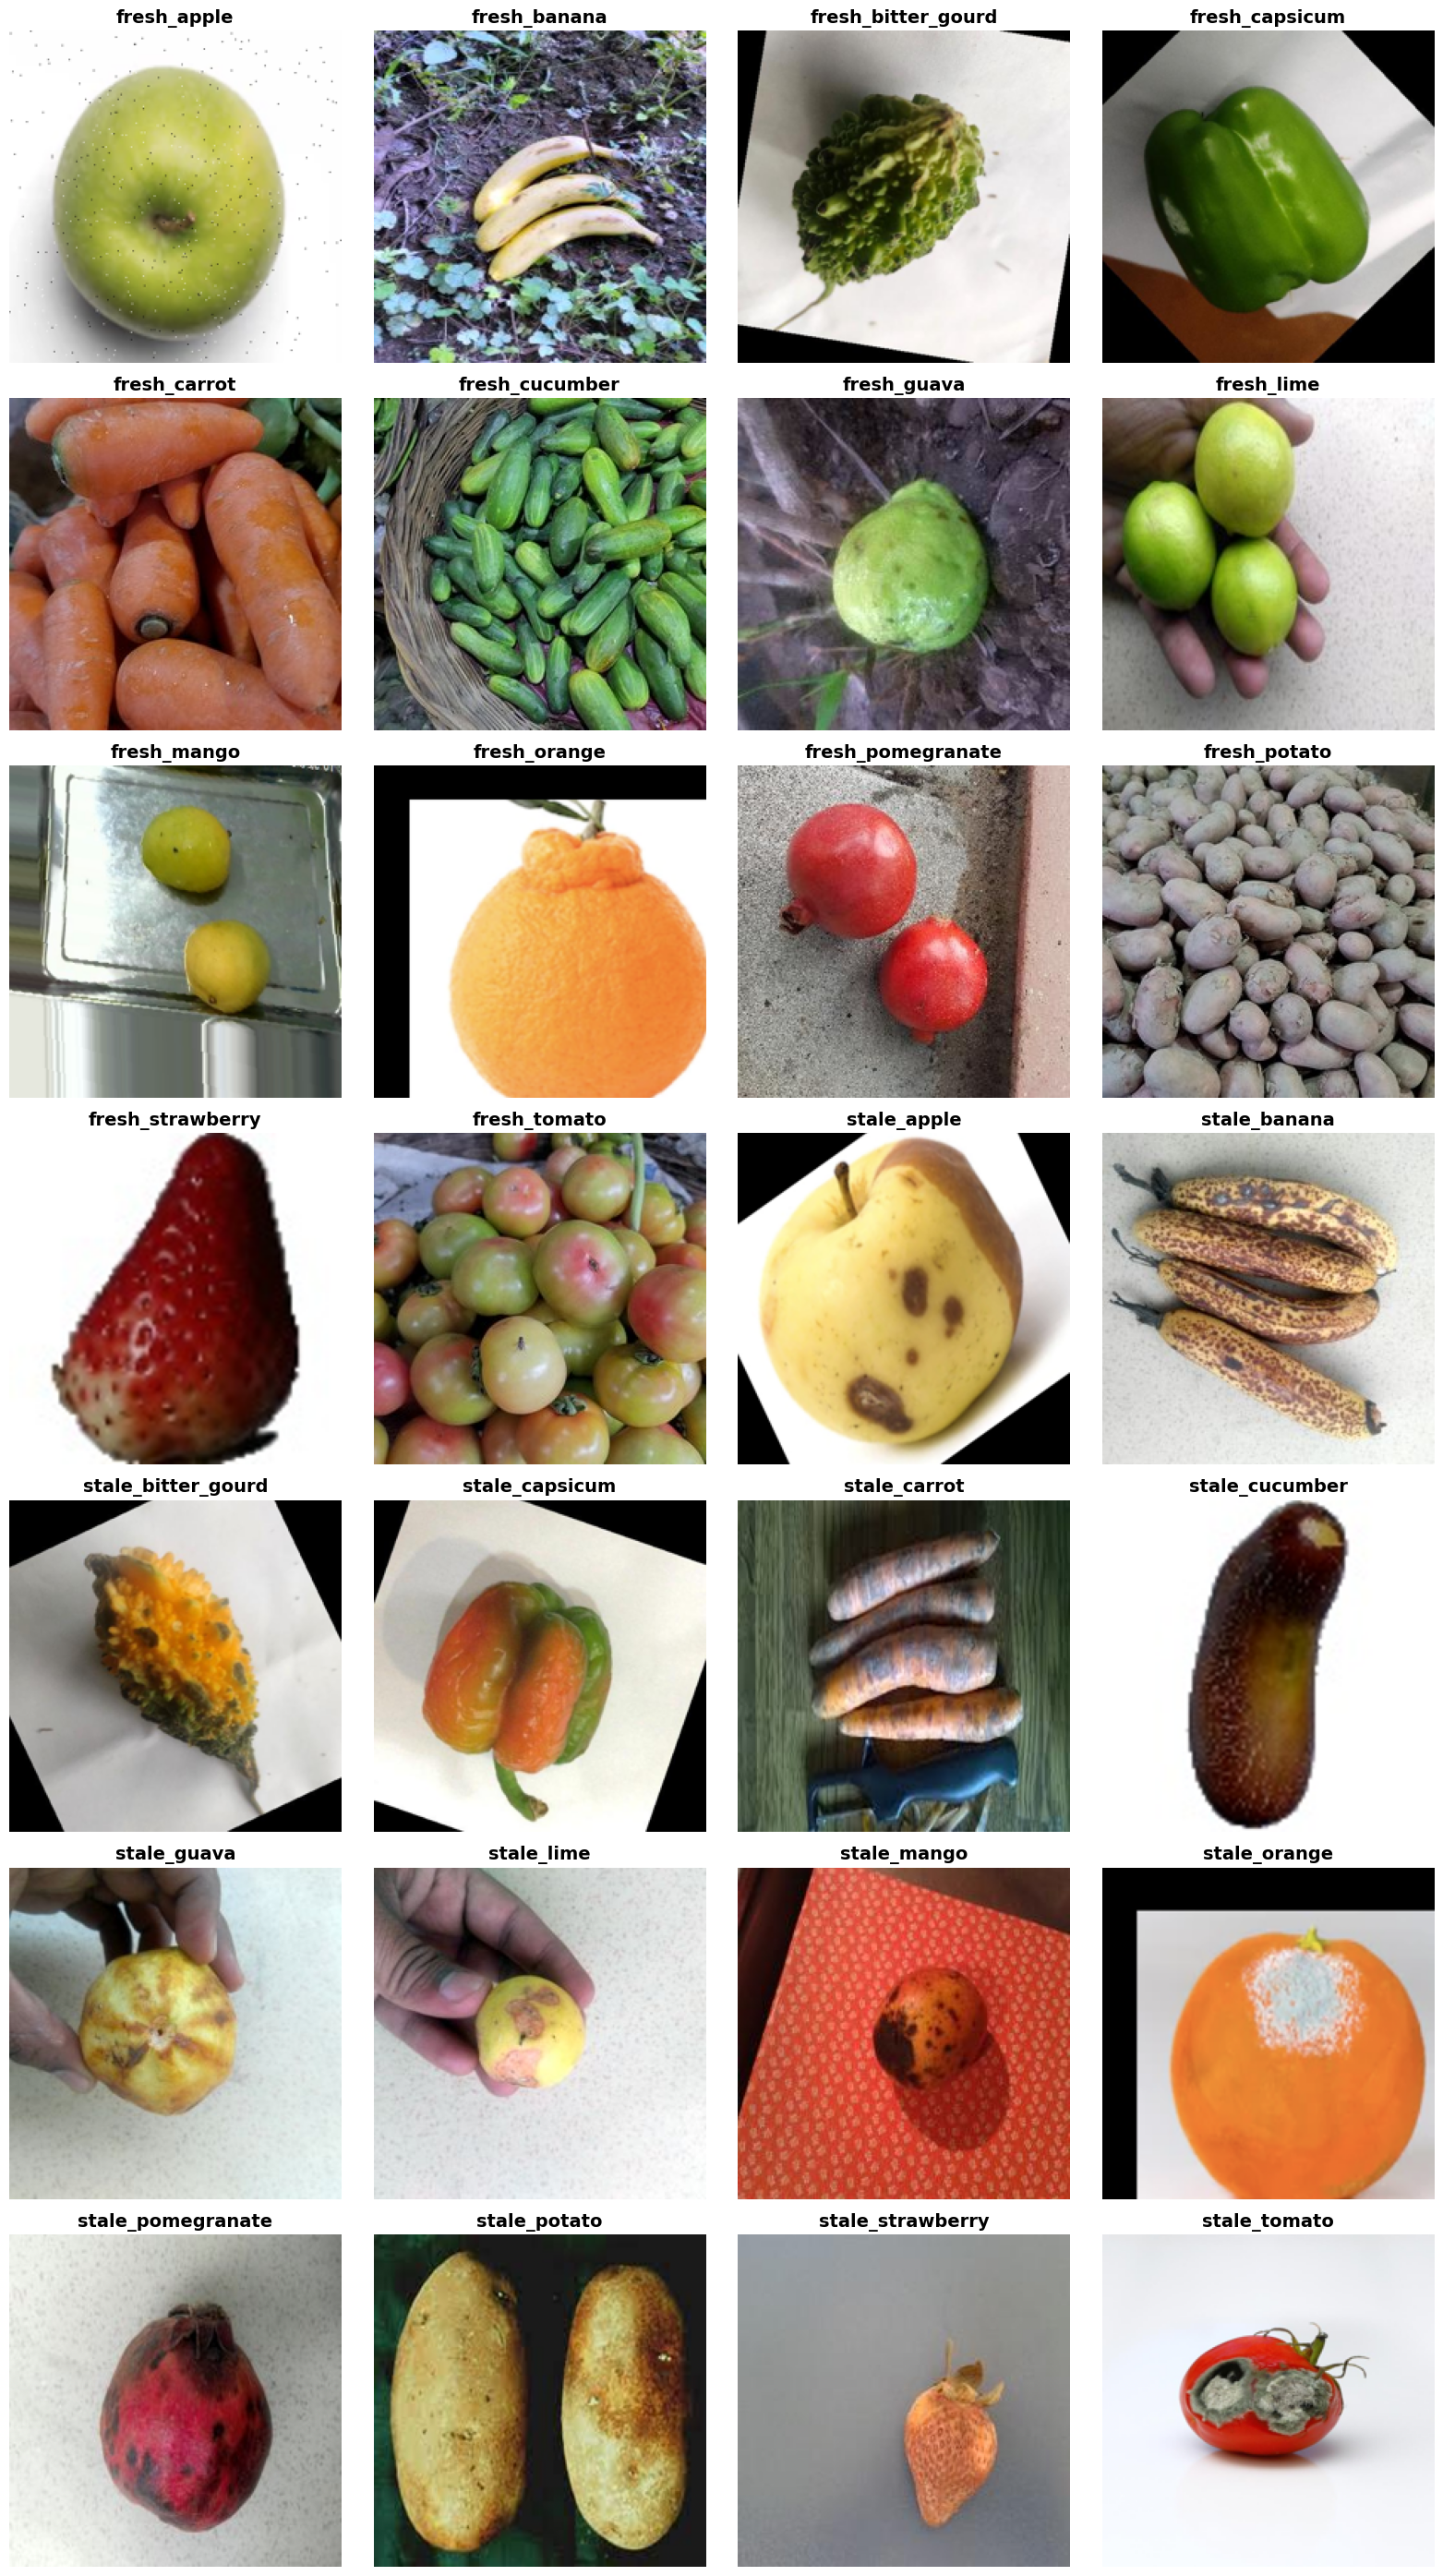

In [58]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

root_location = "/content/dataset"
parent_folder = os.path.join(root_location)
subfolders = [f.path for f in os.scandir(parent_folder) if f.is_dir()]
subfolders.sort()

num_subfolders = len(subfolders)


cols = 4
rows = (num_subfolders + cols - 1) // cols

fig, axs = plt.subplots(rows, cols, figsize=(16, rows * 4))
axs = axs.flatten()

for i in range(num_subfolders):
    folder = subfolders[i]
    folder_name = os.path.basename(folder)
    image_files = [f.path for f in os.scandir(folder) if f.is_file() and f.name.endswith((".jpg", ".jpeg", ".png"))]

    if len(image_files) > 0:
        selected_image = random.choice(image_files)
        image = Image.open(selected_image).resize((224, 224))
        axs[i].imshow(image)
        axs[i].axis('off')
        axs[i].set_title(folder_name, fontsize=14, fontweight='bold')

for j in range(num_subfolders, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.savefig('figure.pdf', bbox_inches='tight')
plt.show()


In [59]:
import os
from PIL import Image, UnidentifiedImageError

root_location = "/content/dataset"

for foldername, subfolders, filenames in os.walk(root_location):
    for filename in filenames:
        if filename.endswith((".jpg", ".jpeg", ".png")):
            image_path = os.path.join(foldername, filename)

            try:
                with Image.open(image_path) as img:
                    if img.mode == "P" and "transparency" in img.info:
                        img = img.convert("RGBA")
                    else:
                        if img.mode in ("RGBA", "LA"):
                            img = img.convert("RGB")

                    img_resized = img.resize((224, 224))

                    img_resized.save(image_path)

            except UnidentifiedImageError:
                print(f"Could not identify image file: {image_path}")
            except Exception as e:
                print(f"Error processing {image_path}: {e}")

print("Check logs for any errors.")
print("images have been resized to 224x224 pixels to feed into model")


Check logs for any errors.
images have been resized to 224x224 pixels to feed into model


In [60]:
import torch

if torch.cuda.is_available():
  device = torch.device("cuda")
  print("GPU is available and being used.")
else:
  device = torch.device("cpu")
  print("GPU is not available, using CPU instead.")

GPU is available and being used.


In [61]:
import os

def print_directory_structure(root_dir):
    for foldername, subfolders, _ in os.walk(root_dir):
        # Print the current directory
        print(foldername.replace(root_dir + "/", ""))
        for subfolder in subfolders:
            print(f"    {subfolder}")

# Change this to your actual dataset directory
dataset_directory = "/content/dataset"
print_directory_structure(dataset_directory)


/content/dataset
    stale_potato
    fresh_banana
    fresh_lime
    fresh_mango
    stale_orange
    fresh_pomegranate
    stale_apple
    stale_carrot
    stale_bitter_gourd
    fresh_capsicum
    fresh_potato
    fresh_apple
    stale_guava
    stale_capsicum
    stale_strawberry
    stale_tomato
    stale_mango
    fresh_bitter_gourd
    fresh_tomato
    stale_banana
    fresh_guava
    fresh_orange
    stale_pomegranate
    stale_cucumber
    fresh_carrot
    fresh_strawberry
    stale_lime
    fresh_cucumber
stale_potato
fresh_banana
fresh_lime
fresh_mango
stale_orange
fresh_pomegranate
stale_apple
stale_carrot
stale_bitter_gourd
fresh_capsicum
fresh_potato
fresh_apple
stale_guava
stale_capsicum
stale_strawberry
stale_tomato
stale_mango
fresh_bitter_gourd
fresh_tomato
stale_banana
fresh_guava
fresh_orange
stale_pomegranate
stale_cucumber
fresh_carrot
fresh_strawberry
stale_lime
fresh_cucumber


In [53]:
'''import shutil
dir_path = '/content/train'
shutil.rmtree(dir_path)
if not os.path.exists(dir_path):
    print(f"{dir_path} has been deleted.")
dir_path2 = '/content/test'
shutil.rmtree(dir_path2)
if not os.path.exists(dir_path2):
    print(f"{dir_path2} has been deleted.")
dir_path3 = '/content/valid'
shutil.rmtree(dir_path3)
if not os.path.exists(dir_path3):
    print(f"{dir_path3} has been deleted.")
dir_path4 = '/content/dataset'
shutil.rmtree(dir_path4)
if not os.path.exists(dir_path4):
    print(f"{dir_path3} has been deleted.")'''

/content/train has been deleted.
/content/test has been deleted.
/content/valid has been deleted.
/content/valid has been deleted.


In [62]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split

# Define the paths
root_directory = '/content/dataset'
train_directory = '/content/train'
valid_directory = '/content/valid'
test_directory = '/content/test'

# Create directories if they don't exist
os.makedirs(train_directory, exist_ok=True)
os.makedirs(valid_directory, exist_ok=True)
os.makedirs(test_directory, exist_ok=True)

# Get class labels (subdirectory names)
class_labels = [folder for folder in os.listdir(root_directory) if os.path.isdir(os.path.join(root_directory, folder))]

# Create train, valid, and test subdirectories for each class label
for label in class_labels:
    os.makedirs(os.path.join(train_directory, label), exist_ok=True)
    os.makedirs(os.path.join(valid_directory, label), exist_ok=True)
    os.makedirs(os.path.join(test_directory, label), exist_ok=True)

for label in class_labels:
    class_path = os.path.join(root_directory, label)
    images = [img for img in os.listdir(class_path) if img.endswith(('.jpg', '.jpeg', '.png'))]

    # Check if there are images to split
    if len(images) == 0:
        print(f"No images found in {label}, skipping this class.")
        #this will print atleast once, when all files have been moved
        continue

    random.shuffle(images)

    # Split images (60% train, 20% valid, 20% test)
    train_images, temp_images = train_test_split(images, test_size=0.4, random_state=42)  # 60% train

# Further split the remaining 40% into 50% validation and 50% test
    valid_images, test_images = train_test_split(temp_images, test_size=0.5, random_state=42)  # 20% valid, 20% test


    # Move the images to respective directories
    for img in train_images:
        shutil.move(os.path.join(class_path, img), os.path.join(train_directory, label, img))
    for img in valid_images:
        shutil.move(os.path.join(class_path, img), os.path.join(valid_directory, label, img))
    for img in test_images:
        shutil.move(os.path.join(class_path, img), os.path.join(test_directory, label, img))

print("Dataset has been split into train, validation, and test sets.")

Dataset has been split into train, validation, and test sets.


In [63]:
import os

def count_images_by_class(directory):
    class_image_count = {}
    for foldername in os.listdir(directory):
        folder_path = os.path.join(directory, foldername)
        if os.path.isdir(folder_path):
            image_count = len([f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))])
            class_image_count[foldername] = image_count
    return class_image_count

train_directory = '/content/train'
valid_directory = '/content/valid'
test_directory = '/content/test'

train_counts = count_images_by_class(train_directory)
valid_counts = count_images_by_class(valid_directory)
test_counts = count_images_by_class(test_directory)

print('Training set:')
for class_name, count in train_counts.items():
    print(f'Class {class_name}: {count} images')

print('\nValidation set:')
for class_name, count in valid_counts.items():
    print(f'Class {class_name}: {count} images')

print('\nTesting set:')
for class_name, count in test_counts.items():
    print(f'Class {class_name}: {count} images')


Training set:
Class stale_potato: 350 images
Class fresh_banana: 1389 images
Class fresh_lime: 656 images
Class fresh_mango: 363 images
Class stale_orange: 1940 images
Class fresh_pomegranate: 3564 images
Class stale_apple: 2373 images
Class stale_carrot: 347 images
Class stale_bitter_gourd: 214 images
Class fresh_capsicum: 960 images
Class fresh_potato: 367 images
Class fresh_apple: 1893 images
Class stale_guava: 677 images
Class stale_capsicum: 895 images
Class stale_strawberry: 363 images
Class stale_tomato: 946 images
Class stale_mango: 361 images
Class fresh_bitter_gourd: 196 images
Class fresh_tomato: 950 images
Class stale_banana: 1644 images
Class fresh_guava: 215 images
Class fresh_orange: 1739 images
Class stale_pomegranate: 712 images
Class stale_cucumber: 337 images
Class fresh_carrot: 370 images
Class fresh_strawberry: 361 images
Class stale_lime: 291 images
Class fresh_cucumber: 361 images

Validation set:
Class stale_potato: 117 images
Class fresh_banana: 463 images
Clas

In [64]:
!zip -r /content/test.zip /content/test
!zip -r /content/train.zip /content/train
!zip -r /content/valid.zip /content/valid
from google.colab import files
files.download("/content/train.zip")
files.download("/content/valid.zip")
files.download("/content/test.zip")

Streaming output truncated to the last 5000 lines.
  adding: content/valid/stale_apple/rotated_by_60_Screen Shot 2018-06-08 at 2.24.37 PM.png (deflated 0%)
  adding: content/valid/stale_apple/rottenApple (146).jpg (deflated 2%)
  adding: content/valid/stale_apple/rotated_by_60_Screen Shot 2018-06-08 at 2.46.50 PM.png (deflated 0%)
  adding: content/valid/stale_apple/rotated_by_30_Screen Shot 2018-06-08 at 2.30.51 PM.png (deflated 0%)
  adding: content/valid/stale_apple/IMG_20190910_172049.jpg (deflated 2%)
  adding: content/valid/stale_apple/rotated_by_15_Screen Shot 2018-06-07 at 2.53.57 PM.png (deflated 0%)
  adding: content/valid/stale_apple/translation_Screen Shot 2018-06-08 at 2.31.33 PM.png (deflated 0%)
  adding: content/valid/stale_apple/IMG_20190910_171740.jpg (deflated 2%)
  adding: content/valid/stale_apple/rottenApple (66).jpg (deflated 2%)
  adding: content/valid/stale_apple/IMG_20190910_172754.jpg (deflated 2%)
  adding: content/valid/stale_apple/rottenApple (319).jpg (de

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [65]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define data transforms
data_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Set up datasets
train_dataset = datasets.ImageFolder('/content/train', transform=data_transforms)
valid_dataset = datasets.ImageFolder('/content/valid', transform=val_test_transforms)
test_dataset = datasets.ImageFolder('/content/test', transform=val_test_transforms)

# Create data loaders
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Get the number of classes
num_classes = len(train_dataset.classes)
print(f"Number of classes: {num_classes}")

Number of classes: 28


In [67]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import OneCycleLR
import torchvision.models as models
import copy

class FruitFreshnessClassifier(nn.Module):
    def __init__(self, num_classes):
        super(FruitFreshnessClassifier, self).__init__()

        # Pre-trained networks
        self.googlenet = models.googlenet(weights=models.GoogLeNet_Weights.IMAGENET1K_V1)
        self.resnext = models.resnext101_32x8d(weights=models.ResNeXt101_32X8D_Weights.IMAGENET1K_V1)
        self.densenet = models.densenet201(weights=models.DenseNet201_Weights.IMAGENET1K_V1)

        # Remove the original fully connected layers
        self.googlenet.fc = nn.Identity()
        self.resnext.fc = nn.Identity()
        self.densenet.classifier = nn.Identity()

        # Feature fusion
        self.fusion = nn.Sequential(
            nn.Linear(1024 + 2048 + 1920, 512),
            nn.ReLU(),
            nn.Dropout(0.35),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        g_features = self.googlenet(x)
        r_features = self.resnext(x)
        d_features = self.densenet(x)

        combined_features = torch.cat((g_features, r_features, d_features), dim=1)
        output = self.fusion(combined_features)
        return output

# Instantiate the model and move it to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = FruitFreshnessClassifier(num_classes).to(device)
print(f"Using device: {device}")

Using device: cuda


In [69]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.amp import GradScaler, autocast
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import OneCycleLR
import copy

# Enable cuDNN auto-tuner
torch.backends.cudnn.benchmark = True

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

batch_size = 16
num_epochs = 30

# Optimize DataLoader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, num_workers=4, pin_memory=True)

# Set up model, optimizer, and learning rate scheduler
model = FruitFreshnessClassifier(num_classes).to(device)
optimizer = optim.AdamW(model.parameters(), lr=1e-5, weight_decay=1e-4)

# Use OneCycleLR scheduler
scheduler = OneCycleLR(optimizer, max_lr=1e-3, steps_per_epoch=len(train_loader), epochs=num_epochs)

# Set up gradient scaler for mixed precision training
scaler = GradScaler('cuda')
criterion = nn.CrossEntropyLoss()

# Gradient accumulation steps
accumulation_steps = 2

patience_limit = 5
best_valid_loss = float('inf')
best_model_wts = copy.deepcopy(model.state_dict())  # Initialize to avoid uninitialized reference
patience_counter = 0

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    train_correct = 0
    train_total = 0

    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Mixed precision training
        with autocast(device_type='cuda'):
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss = loss / accumulation_steps  # Normalize loss

        # Backward pass with gradient scaling
        scaler.scale(loss).backward()

        if (i + 1) % accumulation_steps == 0:
            scaler.step(optimizer)
            scaler.update()
            optimizer.zero_grad()
            scheduler.step()  # Step the scheduler every batch

        train_loss += loss.item() * accumulation_steps
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

        if i % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

    train_loss = train_loss / len(train_loader)
    train_acc = train_correct / train_total

    # Validation
    model.eval()
    valid_loss = 0.0
    valid_correct = 0
    valid_total = 0

    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            valid_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            valid_total += labels.size(0)
            valid_correct += (predicted == labels).sum().item()

    valid_loss = valid_loss / len(valid_loader.dataset)
    valid_acc = valid_correct / valid_total

    print(f"Epoch {epoch+1}/{num_epochs}:")
    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
    print(f"Validation Loss: {valid_loss:.4f}, Validation Acc: {valid_acc:.4f}")

    # Early stopping
    if valid_loss < best_valid_loss:  # Use valid_loss for early stopping
        best_valid_loss = valid_loss
        best_model_wts = copy.deepcopy(model.state_dict())
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience_limit:
            print("Early stopping triggered.")
            break

print("Training completed.")

model.load_state_dict(best_model_wts)



Epoch [1/30], Step [1/1553], Loss: 1.6913
Epoch [1/30], Step [101/1553], Loss: 1.3253
Epoch [1/30], Step [201/1553], Loss: 0.7926
Epoch [1/30], Step [301/1553], Loss: 0.6860
Epoch [1/30], Step [401/1553], Loss: 0.7254
Epoch [1/30], Step [501/1553], Loss: 0.5474
Epoch [1/30], Step [601/1553], Loss: 0.2415
Epoch [1/30], Step [701/1553], Loss: 0.3751
Epoch [1/30], Step [801/1553], Loss: 0.2571
Epoch [1/30], Step [901/1553], Loss: 0.2384
Epoch [1/30], Step [1001/1553], Loss: 0.3393
Epoch [1/30], Step [1101/1553], Loss: 0.0819
Epoch [1/30], Step [1201/1553], Loss: 0.0769
Epoch [1/30], Step [1301/1553], Loss: 0.1636
Epoch [1/30], Step [1401/1553], Loss: 0.1735
Epoch [1/30], Step [1501/1553], Loss: 0.1942
Epoch 1/30:
Train Loss: 0.8271, Train Acc: 0.7863
Validation Loss: 0.0996, Validation Acc: 0.9697
Epoch [2/30], Step [1/1553], Loss: 0.1156
Epoch [2/30], Step [101/1553], Loss: 0.1144
Epoch [2/30], Step [201/1553], Loss: 0.0140
Epoch [2/30], Step [301/1553], Loss: 0.0770
Epoch [2/30], Step [

<All keys matched successfully>

In [70]:
# Load the best weights if necessary
model.load_state_dict(best_model_wts)

# Specify the path to save in Google Drive
model_path = '/content/drive/My Drive/best_model_weights.pth'

# Save the model to the specified path
torch.save(model.state_dict(), model_path)

print(f"Model weights saved to {model_path}")

Model weights saved to /content/drive/My Drive/best_model_weights.pth


In [71]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the best model
model = FruitFreshnessClassifier(num_classes)  # Make sure to use the same architecture
model.load_state_dict(torch.load('/content/drive/My Drive/best_model_weights.pth'))
model.to(device)
model.eval()

# Evaluation
criterion = nn.CrossEntropyLoss()
test_loss = 0.0
test_correct = 0
test_total = 0
all_predictions = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        test_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

test_loss = test_loss / len(test_loader.dataset)
test_accuracy = test_correct / test_total

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate classification report
class_names = test_dataset.classes
report = classification_report(all_labels, all_predictions, target_names=class_names)
print("\nClassification Report:")
print(report)

# Generate and plot confusion matrix
cm = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.close()

# Calculate per-class accuracy
per_class_accuracy = cm.diagonal() / cm.sum(axis=1)
for class_name, accuracy in zip(class_names, per_class_accuracy):
    print(f"{class_name}: {accuracy:.4f}")

# Save results to a file
with open('test_results.txt', 'w') as f:
    f.write(f"Test Loss: {test_loss:.4f}\n")
    f.write(f"Test Accuracy: {test_accuracy:.4f}\n\n")
    f.write("Classification Report:\n")
    f.write(report)
    f.write("\nPer-class Accuracy:\n")
    for class_name, accuracy in zip(class_names, per_class_accuracy):
        f.write(f"{class_name}: {accuracy:.4f}\n")

<ipython-input-71-82049ff424a2>:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/drive/My Drive/best_model_weights.pth'))


Test Loss: 0.0801
Test Accuracy: 0.9756

Classification Report:
                    precision    recall  f1-score   support

       fresh_apple       0.98      0.97      0.98       631
      fresh_banana       0.99      1.00      1.00       463
fresh_bitter_gourd       1.00      1.00      1.00        66
    fresh_capsicum       0.97      0.97      0.97       320
      fresh_carrot       0.90      0.98      0.94       124
    fresh_cucumber       0.98      0.98      0.98       121
       fresh_guava       0.97      0.94      0.96        72
        fresh_lime       0.96      1.00      0.98       219
       fresh_mango       0.96      0.99      0.98       121
      fresh_orange       1.00      0.99      0.99       580
 fresh_pomegranate       0.99      1.00      0.99      1188
      fresh_potato       0.93      0.91      0.92       123
  fresh_strawberry       0.98      1.00      0.99       121
      fresh_tomato       0.97      0.97      0.97       317
       stale_apple       0.97      

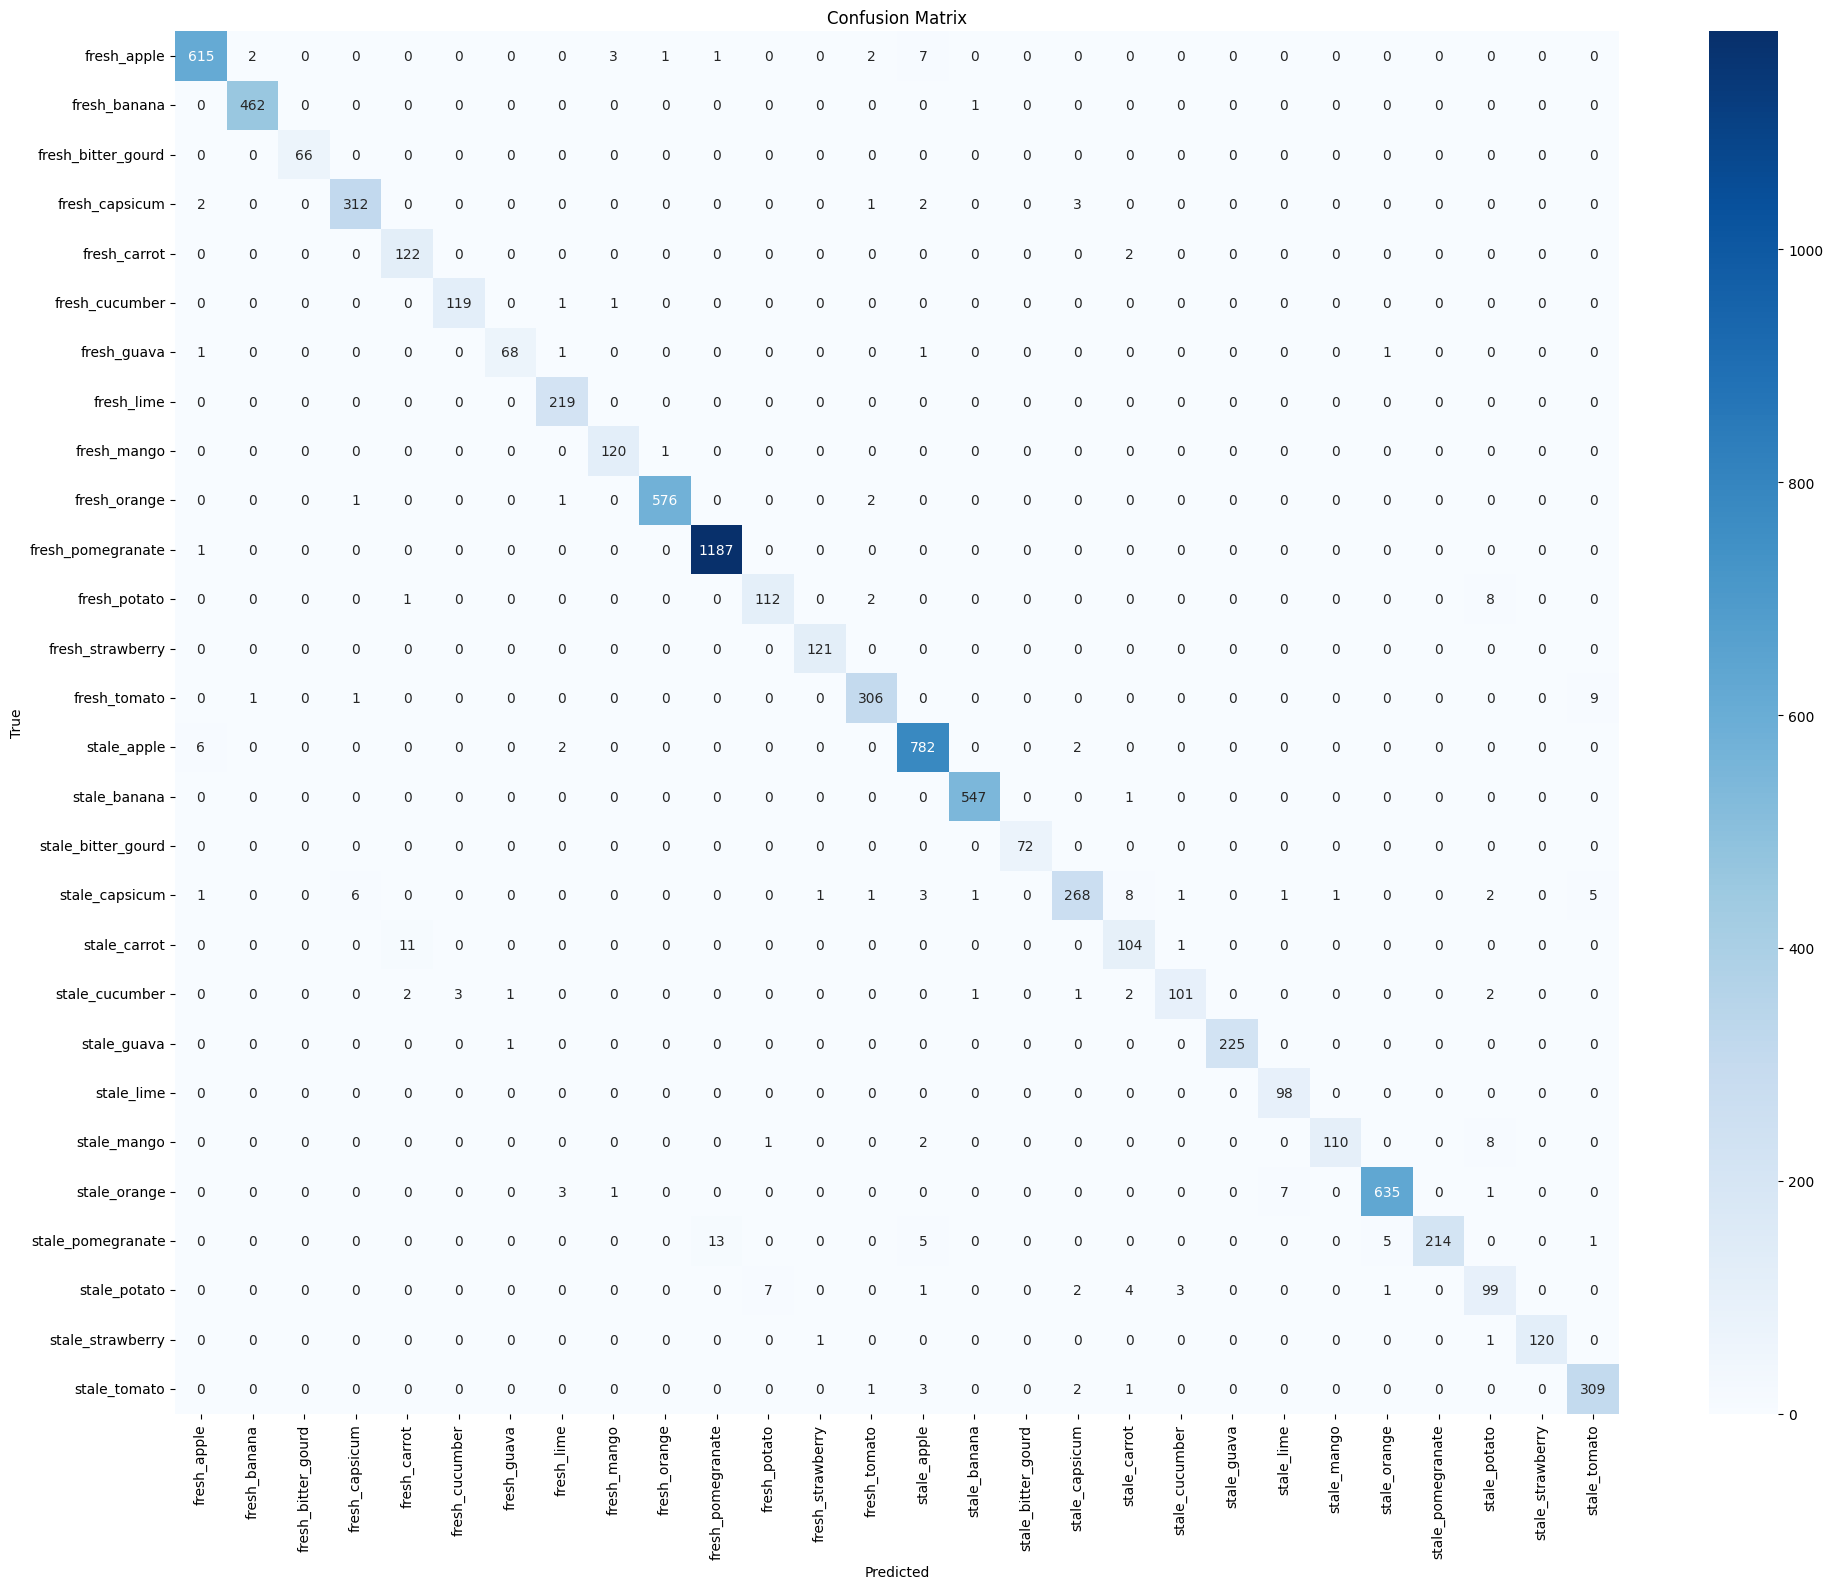

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# After creating the confusion matrix...
plt.figure(figsize=(20, 16))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()

# Display the plot in the notebook
display(plt.gcf())

# Save the figure (optional, if you still want to save it)
plt.savefig('confusion_matrix.png')
plt.close()